# Lab3-Data Engineering EDA with Python SQL and Pandas

## Part 1: Data Collection & Database Connection

### 1. Create a Free SQL Database
- Use Neon.tech to set up a free Postgres database
    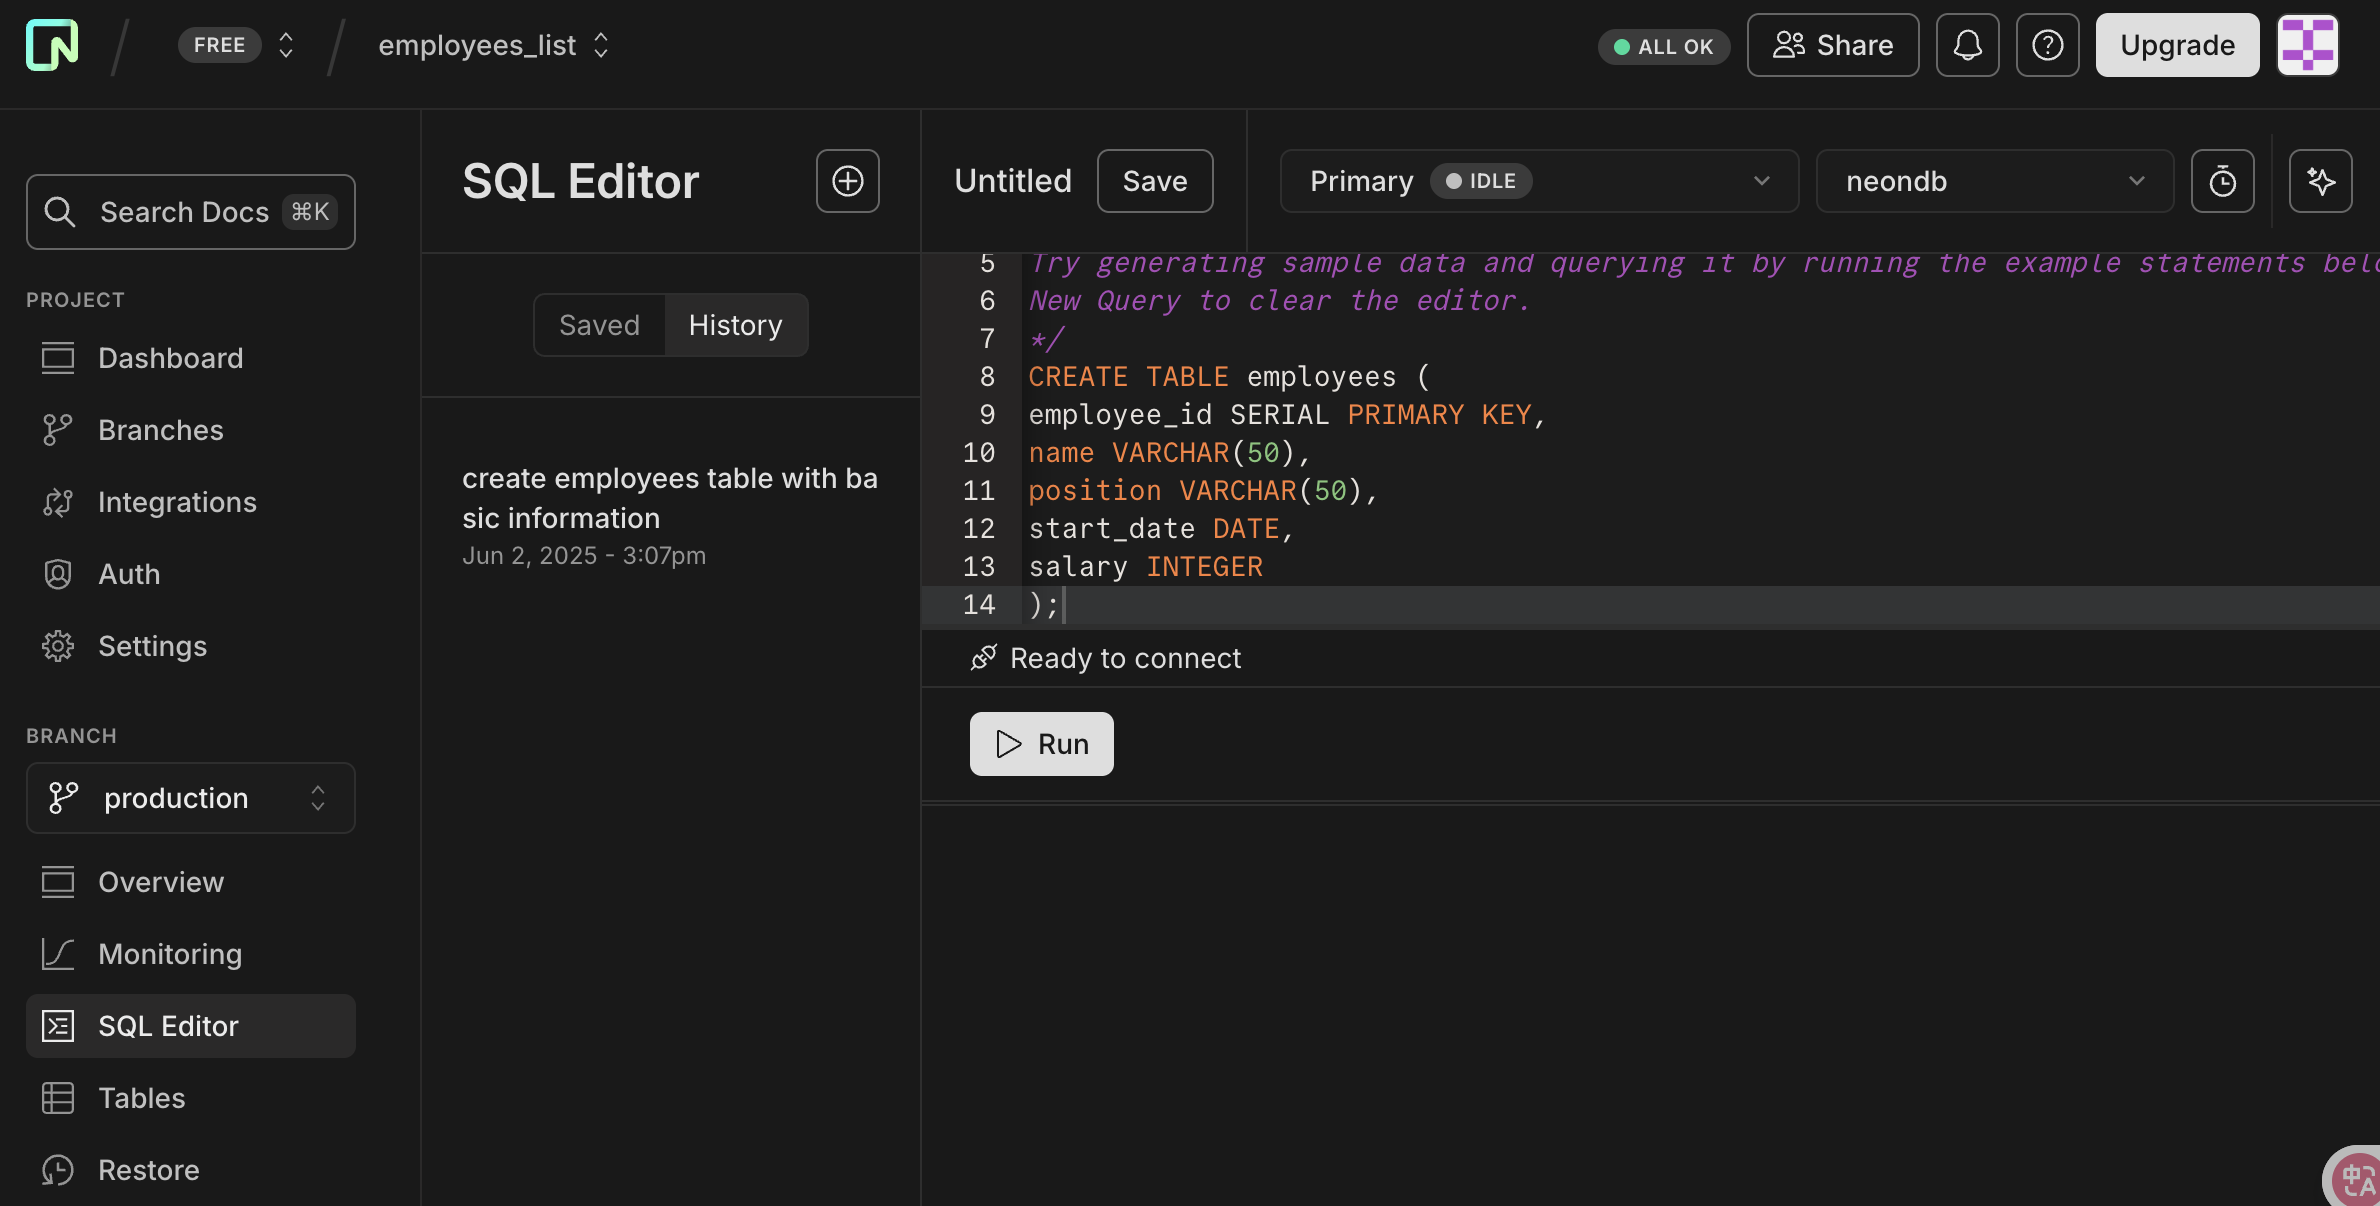

- Create a table named employees with the employee_id (integer, primary key), name (string), position (string, IT-related job titles), start_date (date, between 2015 and 2024), salary (integer, $60,000–$200,000) columns
    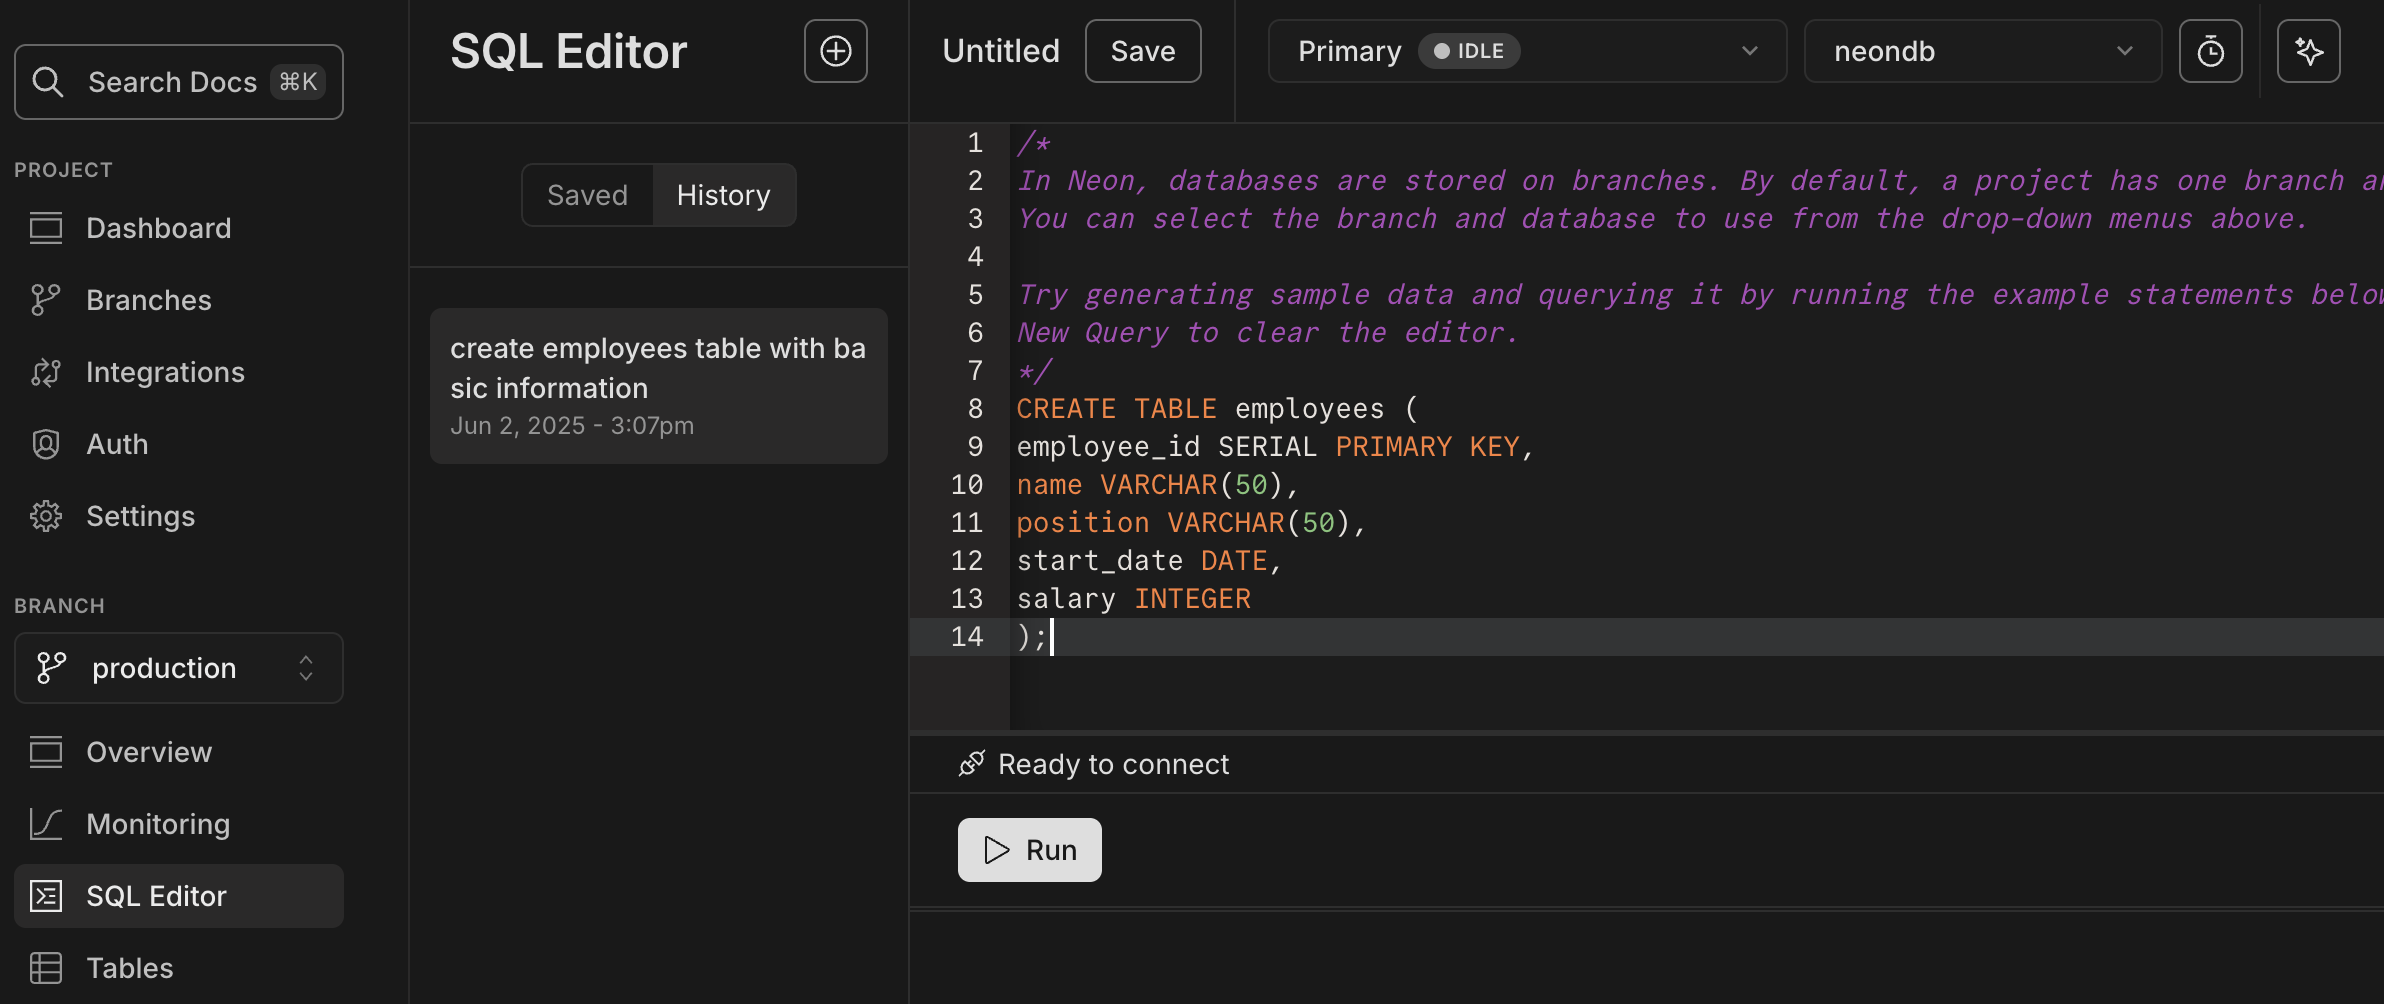

### 2. Generate & Populate Data
- Generate at least 50 synthetic records using Python and the Faker library.

In [56]:
# Install Required Python Packages
!pip install psycopg2-binary pandas
!pip install sqlalchemy psycopg2-binary

In [57]:
# Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from faker import Faker
from datetime import date, datetime
from sqlalchemy import text

In [60]:
# Database Connection Details
DB_HOST = "ep-red-dream-a8ewpgl2-pooler.eastus2.azure.neon.tech"
DB_NAME = "neondb"
DB_USER = "neondb_owner"
DB_PASSWORD = "npg_TwnE2XHBjF7K"
DB_PORT = "5432"

# Database Connection Function
# Establishes and returns a PostgreSQL database connection.
# Args:
#       db_host (str): The database host.
#       db_name (str): The database name.
#       db_user (str): The database username.
#       db_password (str): The database password.
#       db_port (str): The database port.
# Returns: engine or None: The database connection object if successful, else None.
def database_engine(db_host, db_name, db_user, db_password, db_port):
    engine = None

    try:
        db_uri = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
        engine = sqlalchemy.create_engine(db_uri)
        with engine.connect() as connection:
            print("Successfully created SQLAlchemy engine and tested connection.")

        return engine 

    except Exception as e:
        print(f"An unexpected error occurred during connection: {e}")
        return None

In [61]:
# Use Faker library
fake = Faker()

# Define positions
positions = [
'Software Engineer', 'Data Analyst', 'DevOps Engineer', 'ML Engineer', 'QA Engineer',
'Backend Developer', 'Frontend Developer', 'Cloud Architect', 'SysAdmin', 'Data Scientist'
]

# Generate at least 50 synthetic records
employees_data_to_insert = []
for i in range(50):
    name = fake.name().replace("'", "''") # Escape single quotes
    position = random.choice(positions)
    start_date = fake.date_between(start_date=date(2015, 1, 1), end_date=date(2024, 6, 1))
    salary = random.randint(60000, 200000)
    employees_data_to_insert.append((name, position, start_date, salary))
    print(f"Generated {len(employees_data_to_insert)} records for insertion.")

# Connect to the database and populate data 
try:
    # Establish database connection
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Check whether the engine is successfully established
    if engine is None:
        raise Exception("Failed to create database engine.") # If the engine fails to build, throw an exception

    # Use SQLAlchemy's connection management
    with engine.connect() as connection: # Get a connection from the engine pool
        # Begin a transaction
        with connection.begin():
            # Define the INSERT SQL query using SQLAlchemy's text() for parameters
            # Use named parameters (:name, :position, etc.) with SQLAlchemy
            insert_sql = text("""
            INSERT INTO employees (name, position, start_date, salary)
            VALUES (:name, :position, :start_date, :salary);
            """)

            # Prepare data in a dictionary format for SQLAlchemy's execute method
            params_to_insert = [
                {"name": name, "position": pos, "start_date": sd, "salary": sal}
                for name, pos, sd, sal in employees_data_to_insert
            ]

            # Use execute to insert all records. SQLAlchemy handles executemany-like behavior
            # when you pass a list of dictionaries to execute with named parameters.
            connection.execute(insert_sql, params_to_insert)

    print("Data successfully populated into the 'employees' table.")

except Exception as e:
    print(f"An error occurred during data population: {e}")
finally:
    print("Database connection process completed.")

Generated 1 records for insertion.
Generated 2 records for insertion.
Generated 3 records for insertion.
Generated 4 records for insertion.
Generated 5 records for insertion.
Generated 6 records for insertion.
Generated 7 records for insertion.
Generated 8 records for insertion.
Generated 9 records for insertion.
Generated 10 records for insertion.
Generated 11 records for insertion.
Generated 12 records for insertion.
Generated 13 records for insertion.
Generated 14 records for insertion.
Generated 15 records for insertion.
Generated 16 records for insertion.
Generated 17 records for insertion.
Generated 18 records for insertion.
Generated 19 records for insertion.
Generated 20 records for insertion.
Generated 21 records for insertion.
Generated 22 records for insertion.
Generated 23 records for insertion.
Generated 24 records for insertion.
Generated 25 records for insertion.
Generated 26 records for insertion.
Generated 27 records for insertion.
Generated 28 records for insertion.
G

- Insert the data into your cloud database.
    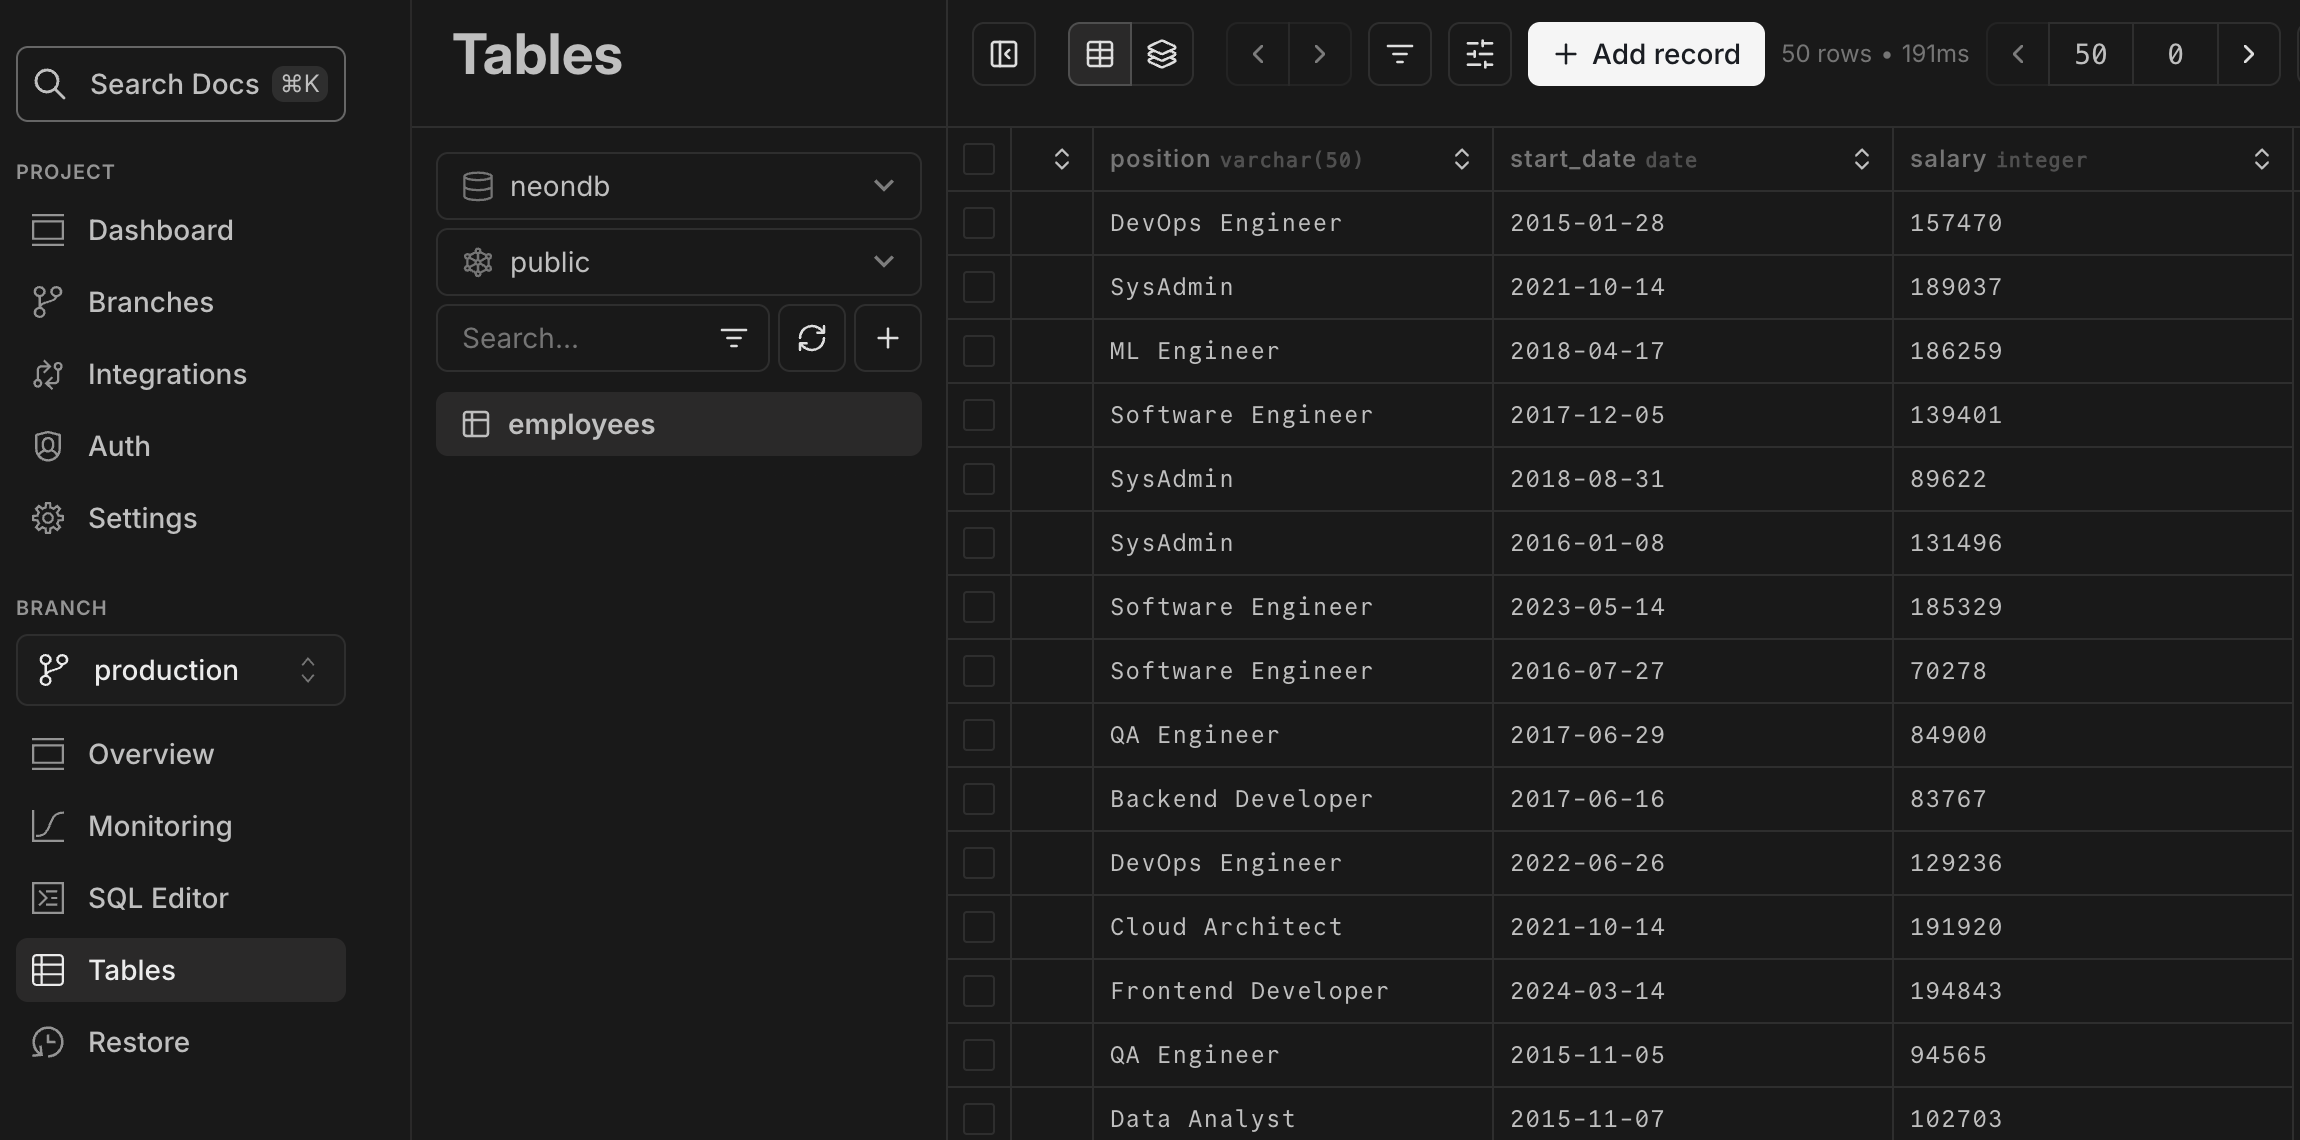

### 3. Connect and Load Data
- Using Python, psycopg2, and Pandas, connect to your cloud database.
- Query the entire employee table and load the data into a Pandas DataFrame.
- Display the first few rows using df.head().

In [62]:
df = pd.DataFrame() # Initialize an empty DataFrame

try:
    # Establish a database connection
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Define a query to query the entire employees table
    sql_query = "SELECT * FROM employees;"

    # Use Pandas' read_sql_query function to execute the query and load it directly into a DataFrame
    # pd.read_sql_query already includes the logic for creating a cursor, executing the query, and getting the results
    df = pd.read_sql_query(sql_query, engine)

    print("The data has been successfully loaded into the Pandas DataFrame ")

    # Display the first few rows of the DataFrame
    print("\nFirst few rows of the DataFrame:")
    print(df.head())

    # Display rows and columns of DataFrame
    print(f"\nTotal number of DataFrame rows: {len(df)}")
    print(f"Total number of DataFrame columns: {len(df.columns)}")

except Exception as e:
    print(f"An error occurred during data population: {e}")
finally:
    print("Database connection process completed.")

Successfully created SQLAlchemy engine and tested connection.
The data has been successfully loaded into the Pandas DataFrame 

First few rows of the DataFrame:
   employee_id              name           position  start_date  salary  \
0          549  Ashley Velasquez           SysAdmin  2017-04-08  113935   
1          550   Morgan Williams  Software Engineer  2016-09-20   77265   
2           92      Mark Kennedy  Software Engineer  2022-05-01  144463   
3           93     Rebecca Jones     Data Scientist  2016-10-14  133316   
4           94  Jennifer Montoya       Data Analyst  2022-10-13   97443   

   department_id  
0            5.0  
1            1.0  
2            2.0  
3            2.0  
4            4.0  

Total number of DataFrame rows: 600
Total number of DataFrame columns: 6
Database connection process completed.


## Part 2: Exploratory Data Analysis (EDA)

### 4. Explain Each EDA Step in Markdown

- Data Collection

    Source: the data is collected from Neon.tech cloud PostgreSQL database.
    
    Method: use the psycopg2 library to establish and connect to the database. Then use the pd.read_sql_query() to execute the employees table.
Finally dataset was downloaded in a Pandas DataFrame to analyze.

    Data generation: ues the Faker library to generate an employees table, including `employee_id`, `name`, `position`, `start_date`, and `salary` fields.

- Data Cleaning

    Purpose: glal is cleaning missing data, incorrect data, and inconsistent values.

    Check for missing values: use the .isnull().sum() to check missing values.

    Check for incorrect values: 

        (1) Position whether is IT position
        (2) Salary is between $60,000 to $200,000
        (3) Start_Date is between 2015 and 2024
    
- Data Transformation

    Purpose: adjust the format or content of data, which can help data analysis.

    Conversion data type: use the datetime of Pandas, which can facilitate date-related calculations.

    Extract year: from the start_date column to create a new start_year column, which can help analyze an employee's joining year.

- Feature Engineering

    Purpose: according to existing columns to create clear and meaningful columns that can enhance data predictive power and analytical perspectives.

    Years of Service: use the start_date column to create a new employee_service_year column. This feature can analyze employee experience, salary, or other indicators.

- Scaling

    Purpose: transforming numerical data into a specific range or distribution, which can help machine learning algorithms and increase data accuracy.

    Method: 
    (1) If the data distribution is unclear or not a normal distribution, use the Min-Max Scaling method, that data ranges from 0 to 1.

    (2) transform the data to a distribution with a mean of 0 and a standard deviation of 1.  Usually, the use of the data is approximately normally distributed.

    Application items: observe the salary distribution first, scale the salary based on the purpose of the model train.



### 5. Show Descriptive Statistic


(1) .info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employee_id    600 non-null    int64  
 1   name           600 non-null    object 
 2   position       600 non-null    object 
 3   start_date     600 non-null    object 
 4   salary         600 non-null    int64  
 5   department_id  550 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 28.3+ KB

(2) .describe()

Descriptive statistics of numeric fields:
       employee_id         salary  department_id
count   600.000000     600.000000     550.000000
mean    300.500000  130403.955000       2.914545
std     173.349358   40981.852037       1.416134
min       1.000000   60076.000000       1.000000
25%     150.750000   94070.250000       2.000000
50%     300.500000  131648.500000       3.000000
75%     450.250000  166187.750000       4.

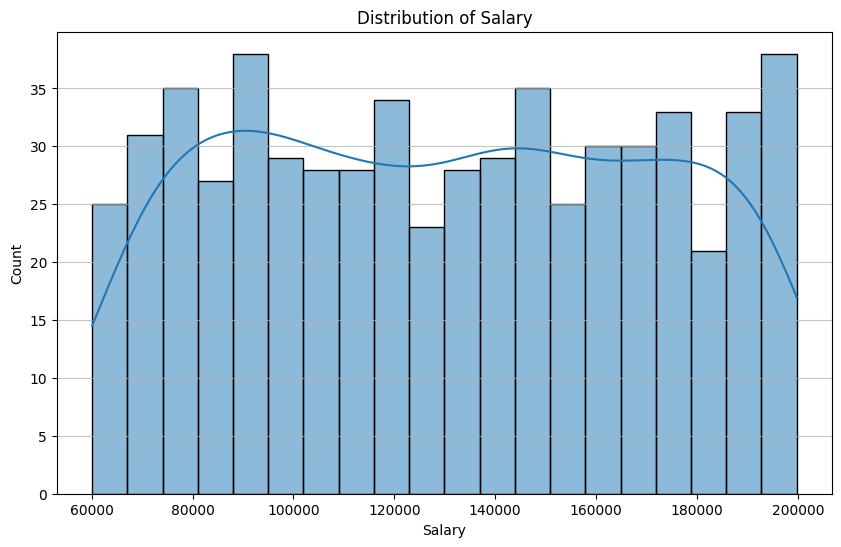

In [63]:
# .info() to view the summary information of the DataFrame, including the number of non-null values ​​and data types
print("(1) .info()")
print("\nDataFrame information:")
df.info()

# .describe() to view descriptive statistics of numeric fields (like: count, mean, standard deviation, minimum, 25/50/75 percentiles, and maximum)
print("\n(2) .describe()")
print("\nDescriptive statistics of numeric fields:")
print(df.describe())

# .isnull().sum() to check the number of missing values ​​in each field
print("\n(3) .isnull().sum()")
print("\nNumber of missing values ​​in each field:")
print(df.isnull().sum())

# Data transformation: Make sure 'start_date' is a datetime
df['start_date'] = pd.to_datetime(df['start_date'])
print("\n(4) The 'start_date' column converted to a datetime type.")
df.info() # Double check the type

# Data transformation/feature engineering: Extract 'start_year'
df['start_year'] = df['start_date'].dt.year
print("\n(5) Added a 'start_year' column and displayed the first few rows:")
print(df[['start_date', 'start_year']].head())

# Feature engineering: Calculate 'employee_service_year'
current_year = datetime.now().year
df['employee_service_year'] = current_year - df['start_year']
print(f"\n(6) Compute 'employee_service_year' (based on the current year {current_year}) and show the first few rows:")
print(df[['start_date', 'start_year', 'employee_service_year']].head())

# .describe() view descriptive statistics again with new columns
print("\n(7) Numerical descriptive statistics with new columns:")
print(df.describe())

# .value_counts() view unique values ​​and counts for the 'position' column
print("\n(8) Unique values ​​and counts for the 'position' column:")
print(df['position'].value_counts())

# View the distribution of 'salary'
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

## 3: Visualization Challenges

### 6. Standard Visualization
Create a grouped bar chart that displays the average salary by position and start year.

Average salary by position and start year:
            position  start_year         salary
0  Backend Developer        2015  129088.666667
1  Backend Developer        2016  124118.076923
2  Backend Developer        2017  118061.400000
3  Backend Developer        2018  144348.666667
4  Backend Developer        2019  120196.714286


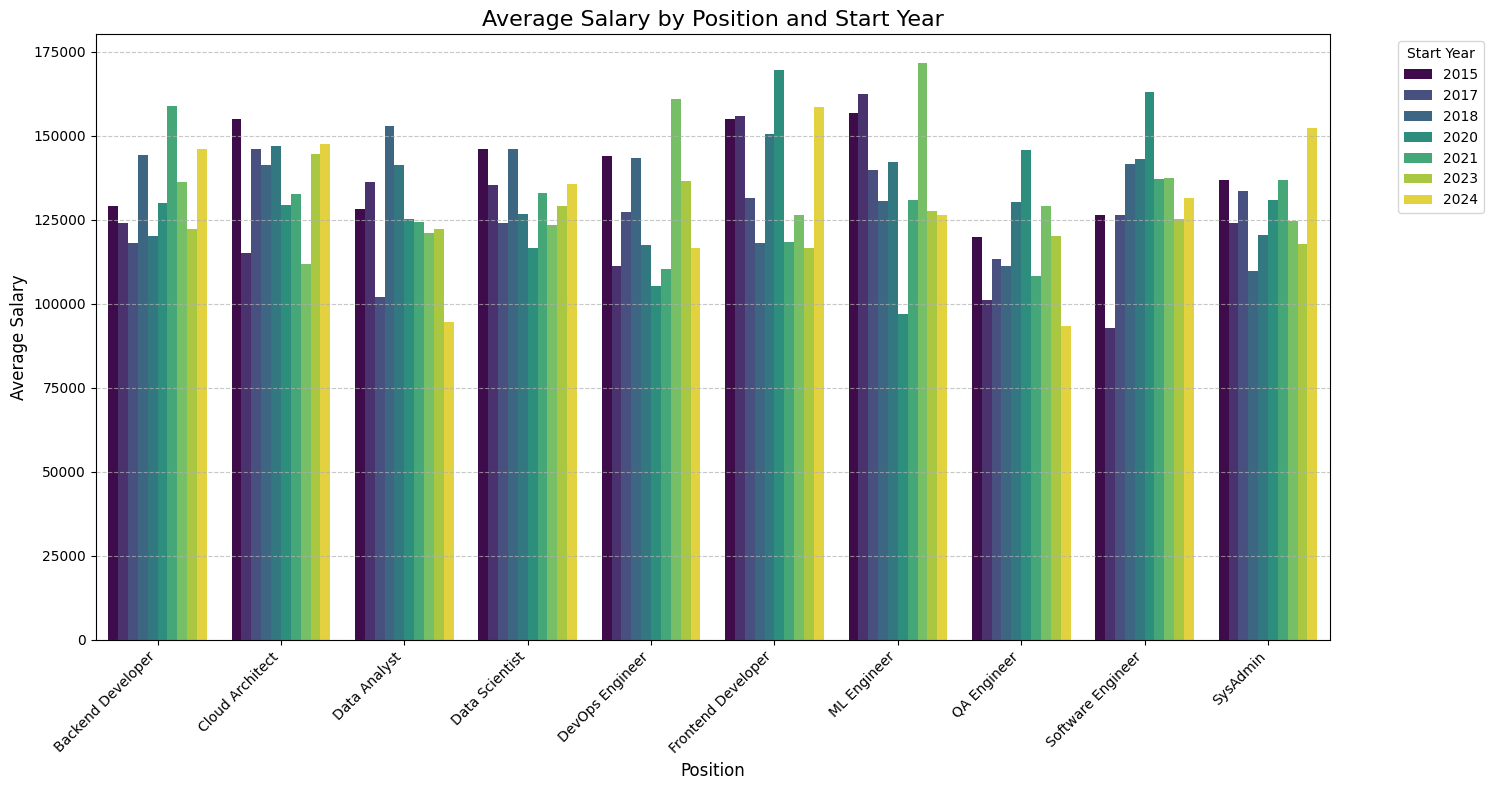

In [64]:
#  Calculate average salary by 'position' and 'start_year' columns and mean of 'salary
average_salary_by_pos_year = df.groupby(['position', 'start_year'])['salary'].mean().reset_index()

# Define all years in order from 2015 to 2024
all_years = list(range(2015, 2025))

# Display the average_salary_by_pos_year first 5 row
print("Average salary by position and start year:")
print(average_salary_by_pos_year.head(5))

# Set the figure size
plt.figure(figsize=(15, 8)) 

# Use seaborn.barplot to create the grouped bar chart
# x-axis: position
# y-axis: average salary
# hue: start_year (this creates the "grouped" effect by year)
sns.barplot(
    data=average_salary_by_pos_year,
    x='position',
    y='salary',
    hue='start_year',
    hue_order=all_years,
    palette='viridis' # Choose a color palette
)
plt.title('Average Salary by Position and Start Year', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Start Year', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for readability
plt.show()


### 7. Advanced Visualization Challenge
- Create a more complex dataset by merging or joining additional information.

    (1) Generate a second table (includes departments with department names, locations, budgets, etc.), then join this with your employees' data.


In [65]:
# Initializing Faker
fake = Faker()

# Define department name and location
department_names = ["Product Development", "Data Science", "Infrastructure", "R&D", "Technical Support"]
locations = ["Kitchener", "Waterloo", "Cambridge", "Toronto"]

# Initialize data frame and connection variables
df_employees_full = pd.DataFrame()
df_departments = pd.DataFrame()
df_merged = pd.DataFrame()


try:
    # Establish database connection using SQLAlchemy Engine
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Check whether the engine is successfully established
    if engine is None:
        raise Exception("Failed to create database engine.")

    # Use a connection from the engine within a 'with' block for proper lifecycle management
    with engine.connect() as connection:
        # Start a transaction for the entire operation if multiple DMLs are involved
        with connection.begin(): # This implicitly handles commit/rollback

            # Create departments table
            # Use text() to wrap the SQL query
            create_departments_table_sql = text("""
            CREATE TABLE IF NOT EXISTS departments (
                department_id SERIAL PRIMARY KEY,
                department_name VARCHAR(255) NOT NULL UNIQUE,
                location VARCHAR(100),
                budget INTEGER);
            """)
            connection.execute(create_departments_table_sql) # Execute using connection.execute()
            print("'departments' table created or already exists.")

            # Generate and populate departments data
            departments_data_to_insert = []
            for dept_name in department_names:
                location = random.choice(locations)
                budget = random.randint(1000000, 10000000)
                departments_data_to_insert.append(
                    {"department_name": dept_name, "location": location, "budget": budget}
                )
            print(f"Generated {len(departments_data_to_insert)} department records for insertion.")

            # Prepare INSERT SQL for executemany-like behavior with SQLAlchemy
            insert_departments_sql = text("""
            INSERT INTO departments (department_name, location, budget)
            VALUES (:department_name, :location, :budget)
            ON CONFLICT (department_name) DO NOTHING;
            """)

            # Pass the list of dictionaries to execute
            connection.execute(insert_departments_sql, departments_data_to_insert)
            print(f"Generated and populated {len(departments_data_to_insert)} department data.")

            # Get all employee IDs from the employees table
            employee_ids_result = connection.execute(text("SELECT employee_id FROM employees;")).fetchall()
            employee_ids = [row[0] for row in employee_ids_result]
            print(f"Fetched {len(employee_ids)} employee IDs.")

            # Get all department IDs from the departments table
            department_ids_result = connection.execute(text("SELECT department_id FROM departments;")).fetchall()
            department_ids = [row[0] for row in department_ids_result]
            print(f"Fetched {len(department_ids)} department IDs.")

            if not department_ids:
                print("No department IDs found. Cannot assign departments to employees. Please populate departments data first.")
                # You might want to raise an error or exit here if departments are crucial
                raise ValueError("No departments found to assign employees to.")

            updates_to_perform = []
            for emp_id in employee_ids:
                # Randomly select a department ID for each employee
                assigned_dept_id = random.choice(department_ids)
                updates_to_perform.append({"department_id": assigned_dept_id, "employee_id": emp_id})

            print(f"Preparing to update {len(updates_to_perform)} employee records with department IDs.")

            # SQL UPDATE statement to set the department_id for each employee
            update_sql = text("""
            UPDATE employees
            SET department_id = :department_id
            WHERE employee_id = :employee_id;
            """)
            connection.execute(update_sql, updates_to_perform) # Execute multiple updates efficiently
            print("Successfully assigned department_id to employees.")

        # SQL JOIN query to merge employees and departments data
        # pd.read_sql_query can take the engine directly or the connection object.
        sql_query_merge = """
        SELECT
            e.employee_id,
            e.name AS employee_name,
            e.position,
            e.start_date,
            e.salary,
            d.department_id,
            d.department_name,
            d.location,
            d.budget
        FROM
            employees AS e
        JOIN
            departments AS d ON e.department_id = d.department_id;
        """
        df_merged = pd.read_sql_query(sql_query_merge, engine) # Use 'engine' here as conn is not persistent outside 'with'
        print("Merged employee and department data successfully loaded into Pandas DataFrame.")

        print("\nFirst few rows of the Merged DataFrame:")
        print(df_merged.head())
        print(f"\nTotal number of Merged DataFrame rows: {len(df_merged)}")
        print(f"Total number of Merged DataFrame columns: {len(df_merged.columns)}")

except Exception as e:
    print(f"Database error during department data population: {e}")
finally:
    print("Database connection process completed.")

Successfully created SQLAlchemy engine and tested connection.
'departments' table created or already exists.
Generated 5 department records for insertion.
Generated and populated 5 department data.
Fetched 600 employee IDs.
Fetched 5 department IDs.
Preparing to update 600 employee records with department IDs.
Successfully assigned department_id to employees.
Merged employee and department data successfully loaded into Pandas DataFrame.

First few rows of the Merged DataFrame:
   employee_id     employee_name           position  start_date  salary  \
0          549  Ashley Velasquez           SysAdmin  2017-04-08  113935   
1          550   Morgan Williams  Software Engineer  2016-09-20   77265   
2           92      Mark Kennedy  Software Engineer  2022-05-01  144463   
3           93     Rebecca Jones     Data Scientist  2016-10-14  133316   
4           94  Jennifer Montoya       Data Analyst  2022-10-13   97443   

   department_id      department_name   location   budget  
0      

(2) Create a “project assignment” table and analyze distribution of salaries or years of service by project or department.

In [66]:
# Initializing Faker
fake = Faker()

try:
    # Establish database connection (engine is the SQLAlchemy Engine)
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Check whether the engine is successfully established
    if engine is None:
        raise Exception("Failed to create database engine.")

    # Use a connection from the engine within a 'with' block for all DML/DDL operations
    with engine.connect() as connection:
        # Start a transaction for the entire series of DDL/DML operations
        with connection.begin(): # This manages commits/rollbacks automatically

            # Create projects table
            create_projects_table_sql = text("""
            CREATE TABLE IF NOT EXISTS projects (
                project_id SERIAL PRIMARY KEY,
                project_name VARCHAR(255) NOT NULL UNIQUE,
                start_date DATE,
                end_date DATE,
                budget INTEGER,
                department_id INTEGER REFERENCES departments(department_id)
            );
            """)
            connection.execute(create_projects_table_sql) # Execute on the 'connection' object
            print("'projects' table created or already exists.")

            # Generate and populate projects data
            project_names = ["Project Alpha", "Project Beta", "Project Gamma", "Project Delta", "Project Epsilon"]
            projects_data_to_insert = []

            # Fetch department IDs to assign projects to departments
            department_ids_result = connection.execute(text("SELECT department_id FROM departments;")).fetchall()
            department_ids_for_projects = [row[0] for row in department_ids_result]
            print(f"Fetched {len(department_ids_for_projects)} department IDs.")


            if not department_ids_for_projects:
                print("No department IDs found for projects. Cannot assign projects to departments.")
            else:
                for p_name in project_names:
                    start_date = fake.date_between(start_date='-2y', end_date='-1y')
                    end_date = fake.date_between(start_date=start_date, end_date='today')
                    budget = random.randint(50000, 5000000)
                    assigned_dept_id_for_project = random.choice(department_ids_for_projects)
                    # Prepare data as dictionaries for SQLAlchemy's execute method
                    projects_data_to_insert.append({
                        "project_name": p_name,
                        "start_date": start_date,
                        "end_date": end_date,
                        "budget": budget,
                        "department_id": assigned_dept_id_for_project
                    })
                print(f"Generated {len(projects_data_to_insert)} project records for insertion.")

                # Prepare INSERT SQL for projects using named parameters
                insert_projects_sql = text("""
                INSERT INTO projects (project_name, start_date, end_date, budget, department_id)
                VALUES (:project_name, :start_date, :end_date, :budget, :department_id)
                ON CONFLICT (project_name) DO NOTHING;
                """)
                connection.execute(insert_projects_sql, projects_data_to_insert) # Execute on connection with list of dicts
                print(f"Generated and populated {len(projects_data_to_insert)} project data.")


            # Create project_assignments table
            create_assignments_table_sql = text("""
            CREATE TABLE IF NOT EXISTS project_assignments (
                assignment_id SERIAL PRIMARY KEY,
                employee_id INTEGER REFERENCES employees(employee_id),
                project_id INTEGER REFERENCES projects(project_id),
                assignment_date DATE DEFAULT CURRENT_DATE,
                role VARCHAR(100),
                UNIQUE (employee_id, project_id)
            );
            """)
            connection.execute(create_assignments_table_sql) # Execute on the 'connection' object
            print("'project_assignments' table created or already exists.")

            # Assign employees to projects
            all_employee_ids_result = connection.execute(text("SELECT employee_id FROM employees;")).fetchall()
            all_employee_ids = [row[0] for row in all_employee_ids_result]
            all_project_ids_result = connection.execute(text("SELECT project_id FROM projects;")).fetchall()
            all_project_ids = [row[0] for row in all_project_ids_result]

            if not all_employee_ids or not all_project_ids:
                print("Cannot assign employees to projects: no employees or projects found.")
            else:
                assignments_to_perform = []
                roles = ["Developer", "Tester", "Project Manager", "Analyst", "Designer"]
                # Assign each employee to a random number of projects (e.g., 1 to 3)
                for emp_id in all_employee_ids:
                    num_projects_to_assign = random.randint(1, 3)
                    # Ensure we don't try to sample more projects than available
                    assigned_projects_for_employee = random.sample(all_project_ids, min(num_projects_to_assign, len(all_project_ids)))
                    for proj_id in assigned_projects_for_employee:
                        role = random.choice(roles)
                        # Prepare data as dictionaries
                        assignments_to_perform.append({
                            "employee_id": emp_id,
                            "project_id": proj_id,
                            "role": role
                        })

                print(f"Preparing to insert {len(assignments_to_perform)} project assignment records.")

                insert_assignments_sql = text("""
                INSERT INTO project_assignments (employee_id, project_id, role)
                VALUES (:employee_id, :project_id, :role)
                ON CONFLICT (employee_id, project_id) DO NOTHING;
                """)
                connection.execute(insert_assignments_sql, assignments_to_perform)
                print("Successfully assigned employees to projects.")

        # Analyze distribution of salaries or years of service by project
        analysis_query_by_project = """
        SELECT
            p.project_name,
            AVG(e.salary) AS average_salary_on_project,
            AVG(EXTRACT(YEAR FROM AGE(CURRENT_DATE, e.start_date))) AS average_years_of_service_on_project,
            COUNT(DISTINCT e.employee_id) AS num_employees_on_project
        FROM
            employees AS e
        JOIN
            project_assignments AS pa ON e.employee_id = pa.employee_id
        JOIN
            projects AS p ON pa.project_id = p.project_id
        GROUP BY
            p.project_name
        ORDER BY
            p.project_name;
        """
        df_project_analysis = pd.read_sql_query(analysis_query_by_project, engine)
        print("\nAnalysis of Salaries and Years of Service by Project:")
        print(df_project_analysis)

        # Analyze distribution of salaries or years of service by department
        analysis_query_by_department = """
        SELECT
            d.department_name,
            AVG(e.salary) AS average_salary_in_department,
            AVG(EXTRACT(YEAR FROM AGE(CURRENT_DATE, e.start_date))) AS average_years_of_service_in_department,
            COUNT(e.employee_id) AS num_employees_in_department
        FROM
            employees AS e
        JOIN
            departments AS d ON e.department_id = d.department_id
        GROUP BY
            d.department_name
        ORDER BY
            d.department_name;
        """
        df_department_analysis = pd.read_sql_query(analysis_query_by_department, engine)
        print("\nAnalysis of Salaries and Years of Service by Department:")
        print(df_department_analysis)

except Exception as e:
    print(f"Database error during data operations: {e}")
finally:
    print("Database connection closed.")

Successfully created SQLAlchemy engine and tested connection.
'projects' table created or already exists.
Fetched 5 department IDs.
Generated 5 project records for insertion.
Generated and populated 5 project data.
'project_assignments' table created or already exists.
Preparing to insert 1203 project assignment records.
Successfully assigned employees to projects.

Analysis of Salaries and Years of Service by Project:
      project_name  average_salary_on_project  \
0    Project Alpha              131047.144898   
1     Project Beta              130649.294589   
2    Project Delta              130649.484787   
3  Project Epsilon              130871.443277   
4    Project Gamma              131070.836777   

   average_years_of_service_on_project  num_employees_on_project  
0                             5.506122                       490  
1                             5.444890                       499  
2                             5.409736                       493  
3             

- Produce an advanced visualization:
    - heatmap of average salary by department and position, scatter plot with trendline, or a multi-facet bar chart showing salary trends by both department and year.

Successfully created SQLAlchemy engine and tested connection.


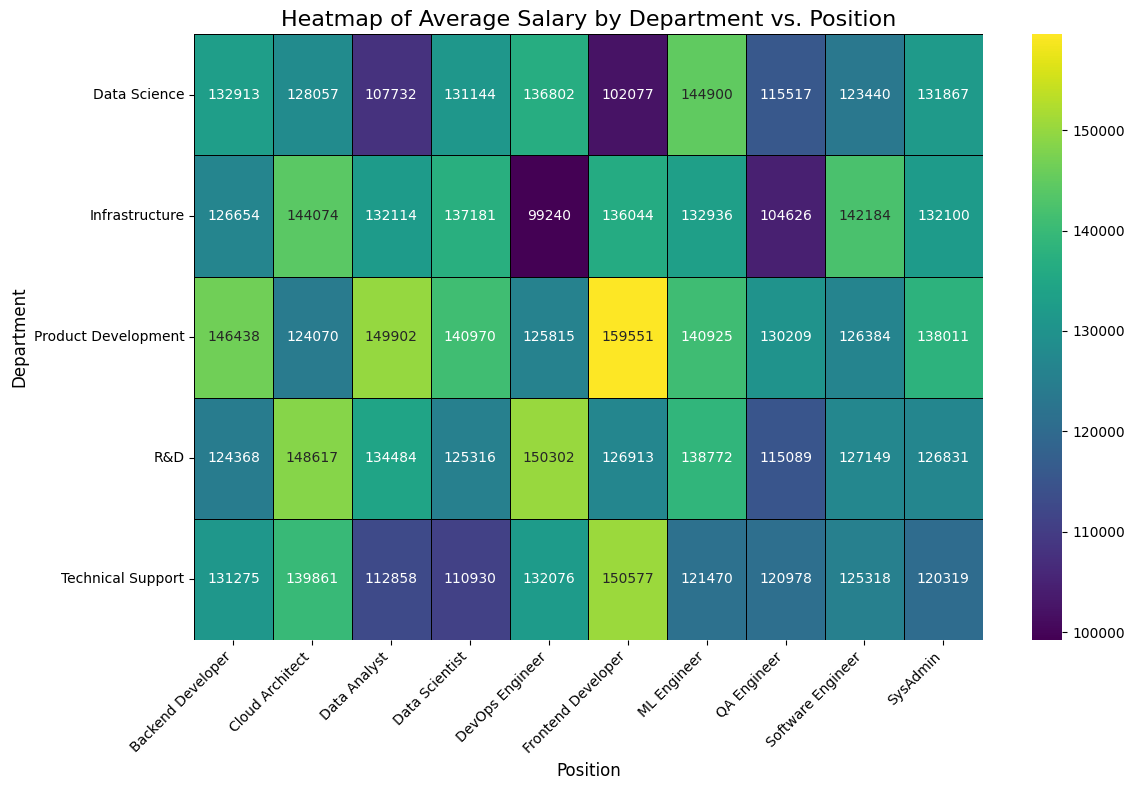

Database connection closed.


In [67]:
# Heatmap of Average Salary by Department vs. Position
try:
    # Establish database connection
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Check whether the engine is successfully established
    if engine is None:
        raise Exception("Failed to create database engine.")

    # Data Retrieval for Heatmap
    # Fetch employee position and salary, and departments department_name
    sql_query_for_heatmap = """
    SELECT
        e.position,
        e.salary,
        d.department_name
    FROM
        employees AS e
    JOIN
        departments AS d ON e.department_id = d.department_id;
    """
    df_for_heatmap = pd.read_sql_query(sql_query_for_heatmap, engine)

    if not df_for_heatmap.empty and 'position' in df_for_heatmap.columns:
        # Calculate the average salary for each combination of department and position
        pivot_table = df_for_heatmap.pivot_table(
            values='salary',
            index='department_name', # Rows will be departments
            columns='position',      # Columns will be positions
            aggfunc='mean'           # Aggregate by mean salary
        )

        # Visualization Heatmap
        plt.figure(figsize=(12, 8)) # Set the figure size
        sns.heatmap(
            pivot_table,
            annot=True,      # Display the salary values on the heatmap cells
            fmt=".0f",       # Format the annotations as integers (no decimal places)
            cmap="viridis",  # Choose a color map (e.g., 'viridis', 'YlGnBu', 'coolwarm')
            linewidths=.5,   # Add lines between cells for better separation
            linecolor='black' # Color of the lines
        )
        plt.title('Heatmap of Average Salary by Department vs. Position', fontsize=16)
        plt.xlabel('Position', fontsize=12)
        plt.ylabel('Department', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
        plt.yticks(rotation=0)             # Keep y-axis labels horizontal
        plt.tight_layout() # Adjust plot to ensure everything fits
        plt.show() # Display the plot
    else:
        print("DataFrame for heatmap is empty or missing 'position' column. Cannot generate heatmap.")

except Exception as e:
    print(f"Error during heatmap visualization: {e}")
finally:
    print("Database connection closed.")

Successfully created SQLAlchemy engine and tested connection.


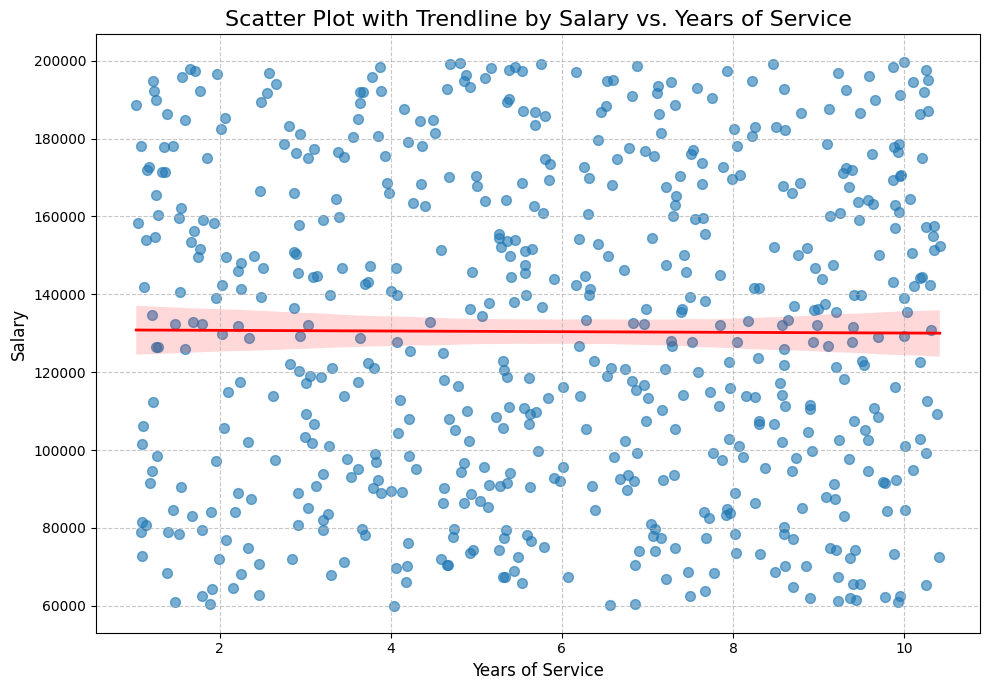

Database connection closed.


In [68]:
# Scatter Plot with Trendline by Salary vs. Years of Service
try:
    # Establish database connection
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Check whether the engine is successfully established
    if engine is None:
        raise Exception("Failed to create database engine.")
    
    # Data Retrieval for Scatter Plot
    # Fetch employee salary and years of service
    sql_query_for_scatter = """
    SELECT
        e.salary,
        e.start_date
    FROM
        employees AS e;
    """
    df_for_scatter = pd.read_sql_query(sql_query_for_scatter, engine)

    if not df_for_scatter.empty and 'start_date' in df_for_scatter.columns:
        # Calculate 'years_of_service' from 'start_date'
        current_date = datetime.now()
        df_for_scatter['years_of_service'] = df_for_scatter['start_date'].apply(
            lambda date: (current_date - pd.to_datetime(date)).days / 365.25
        ) # Convert to datetime object first

        # Visualization Scatter Plot 
        plt.figure(figsize=(10, 7))
        sns.regplot(
            x='years_of_service', # X-axis: Years of Service
            y='salary',           # Y-axis: Salary
            data=df_for_scatter,  # Data source
            scatter_kws={'alpha':0.6, 's': 50}, # Scatter point properties (transparency, size)
            line_kws={'color': 'red', 'lw': 2}   # Trendline properties (color, line width)
        )
        plt.title('Scatter Plot with Trendline by Salary vs. Years of Service', fontsize=16)
        plt.xlabel('Years of Service', fontsize=12)
        plt.ylabel('Salary', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
        plt.tight_layout()
        plt.show()
    else:
        print("DataFrame for scatter plot is empty or missing 'start_date' column. Cannot generate scatter plot.")

except Exception as e:
    print(f"Error during scatter plot visualization: {e}")
finally:
    print("Database connection closed.")

Successfully created SQLAlchemy engine and tested connection.


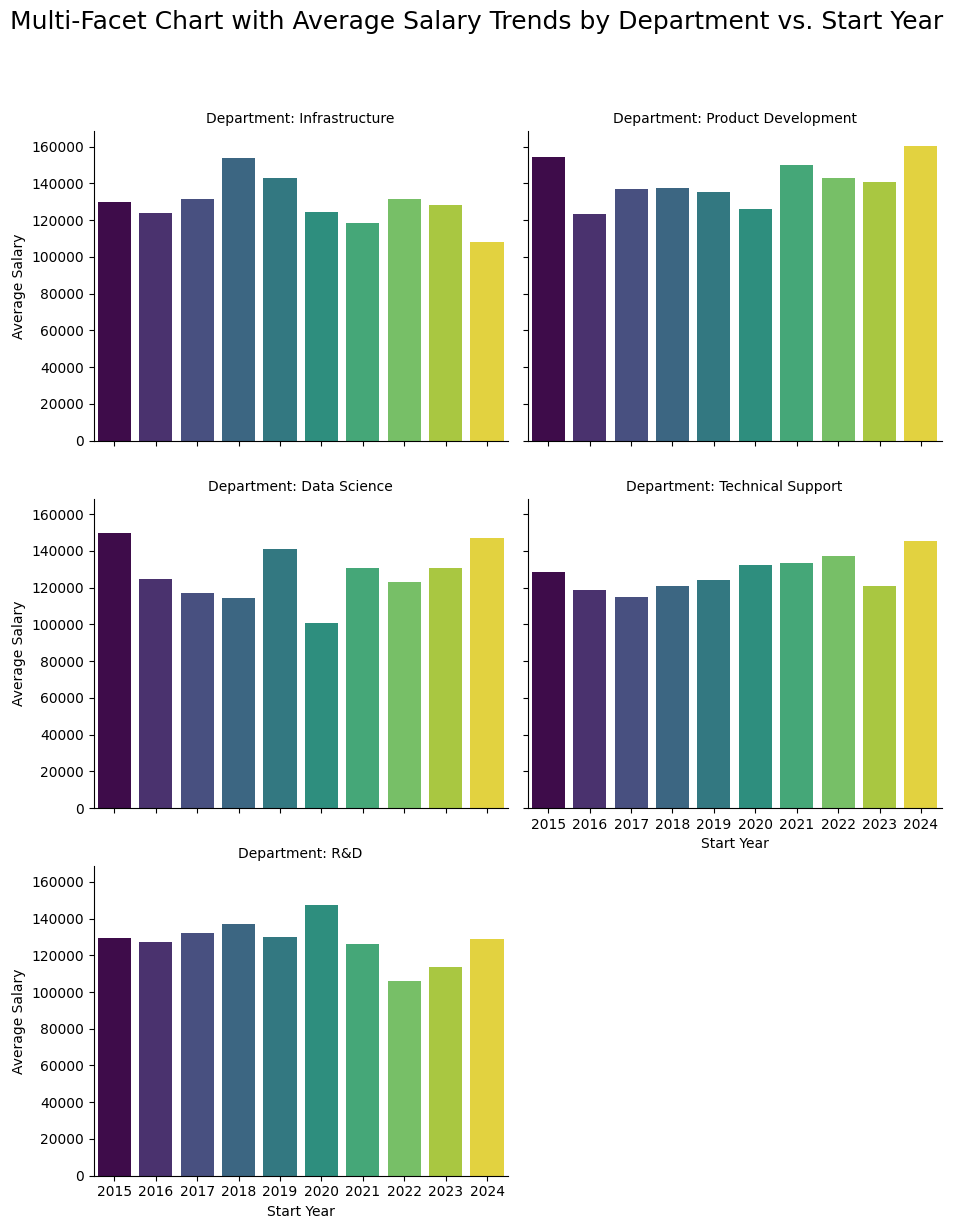

Database connection closed.


In [69]:
# Multi-Facet Bar Chart Salary Trends by Department and Year
try:
    # Establish database connection
    engine = database_engine(DB_HOST, DB_NAME, DB_USER, DB_PASSWORD, DB_PORT)

    # Check whether the engine is successfully established
    if engine is None:
        raise Exception("Failed to create database engine.")

    # Data Retrieval for Multi-Facet Chart
    # Fetch employee salary and start dates, and departments department_names.
    sql_query_for_facet_chart = """
    SELECT
        e.salary,
        e.start_date,
        d.department_name
    FROM
        employees AS e
    JOIN
        departments AS d ON e.department_id = d.department_id;
    """
    df_for_facet_chart = pd.read_sql_query(sql_query_for_facet_chart, engine)

    if not df_for_facet_chart.empty and 'start_date' in df_for_facet_chart.columns:
        # Extract the start year from the 'start_date'
        df_for_facet_chart['start_year'] = pd.to_datetime(df_for_facet_chart['start_date']).dt.year

        # Visualization Multi-Facet Bar Chart
        # `catplot` combines a FacetGrid with a categorical plot (like barplot)
        g = sns.catplot(
            data=df_for_facet_chart,
            x='start_year',         # X-axis: Start Year
            y='salary',             # Y-axis: Salary (will be averaged by default for 'bar' kind)
            col='department_name',  # Create separate columns of plots for each department
            kind='bar',             # Type of plot: bar chart
            col_wrap=2,             # Wrap columns after 3 plots per row
            height=4,               # Height of each subplot
            aspect=1.2,             # Aspect ratio of each subplot (width / height)
            errorbar=None,          # Do not show error bars (can be 'sd' for standard deviation)
            palette='viridis',      # Color palette for the bars
            hue='start_year',       # Explicitly specify the hue variable
            legend=False,           # Turn off the legend, because the x-axis already shows the year
            order=sorted(df_for_facet_chart['start_year'].unique()) # Ensure years are sorted
        )
        g.set_xlabels("Start Year")
        g.set_axis_labels("Start Year", "Average Salary") # Set labels for all subplots
        g.set_titles("Department: {col_name}")           # Set titles for each subplot
        plt.suptitle('Multi-Facet Chart with Average Salary Trends by Department vs. Start Year', y=1.02, fontsize=18) # Overall title for the figure
        plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
        plt.show()
    else:
        print("DataFrame for facet chart is empty or missing 'start_date' column. Cannot generate facet chart.")

except Exception as e:
    print(f"Error during facet chart visualization: {e}")
finally:
    print("Database connection closed.")

### 8. Explain Insights
Explaining the main findings from each visualization.
    
- Heatmap of Average Salary by Department vs. Position

    According to the heatmap, we can find:
    
    (1) Easy to identify the average salary for different positions within various departments.

    (2) If the colors are yellow/light green, it indicates higher salaries. If the colors are purple/dark blue, it indicates lower salaries.

    (3) The highest earning roles and departments are Frontend Developer of Product Development ($159,551). 
    
    (4) The lowest earning roles and departments are the DevOps Engineer of Infrastructure ($99,240). Also, the average salary of a QA Engineer is lower than in other positions.

- Scatter Plot with Trendline by Salary vs. Years of Service

    According to the scatter plot, we can find:

    (1) Display the relationship between an employee's years of service and their salary. The red line represents a linear trendline, which shows the general direction for years of service and salary. The red shaded area shows the confidence interval for this trend.
    
    (2) An employee's years of service and their salary do not positive linear correlation. Can not show that the salary will increase with years of service.
    
    (3) Wide Salary Range at All Service Levels. Years of service are not a primary driver of salary progression.

- Multi-Facet Chart with Average Salary Trends by Department vs. Start Year

    According to the scatter plot, we can find:

    (1) Multi-Facet Bar Chart displays each panel represents a specific department and shows how the average salary of employees hired in a given year has evolved.
    
    (2) The average salary of the departments has increased to 2021~2023. That represents have market demand and hiring of more specialized roles.
    
    (3) Existence of average salaries variability within departments, like the Infrastructure department, which has a significant dip in 2019 and a large jump in 2022.
    